<div class="alert alert-block alert-success">
    <h2 style="text-align: left">Simple Linear Regression</h2>
</div>

**Simple linear regression** is a statistical method that we can use to find a relationship between two variables and make predictions. It produces a line of best fit, or the regression line.

The two variables used are typically denoted as `X` and `y`. 
- `X`: The independent variable, or the variable used to predict the dependent variable. 
- `y`: The dependent variable, or the outcome/output.

### Example: how years of experience affect salaries? 

**Process:**
1. read the dataset
2. preprocess the dataset
3. split the dataset into training and testing sets
4. fit the regression model
5. predict the test set results 
6. evaluate the model

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

In [3]:
# exploring the dataset
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
# data preprocessing
X = dataset.iloc[:, :-1].values  #independent variable array
y = dataset.iloc[:,1].values  #dependent variable array
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


Text(0, 0.5, 'Salaries')

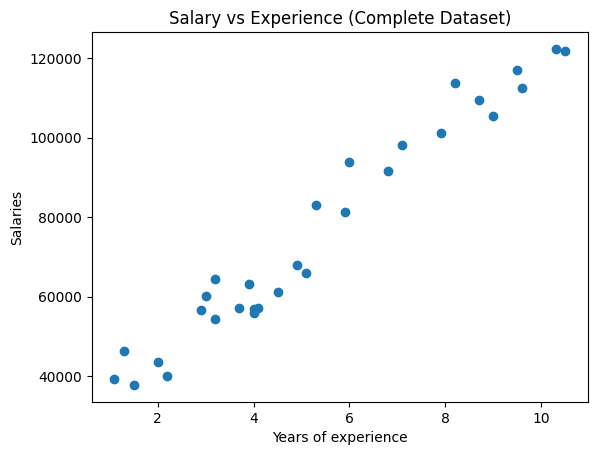

In [5]:
# Visualizing the dataset
plt.scatter(X, y) 
plt.title("Salary vs Experience (Complete Dataset)")
  
plt.xlabel("Years of experience") 
plt.ylabel("Salaries") 

In [6]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

##### Alternative way to split the dataset

In [7]:
# Shuffle your dataset      
shuffle_df = dataset.sample(frac=1)  #Random State not included 

# Define a size for your train set 
train_size = int(0.7 * len(dataset))

# Split your dataset  
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

# Get independent variable array
X_train = train_set.iloc[:, :-1].values  #independent variable array
X_test = test_set.iloc[:, :-1].values

# Get dependent variable array
y_train = train_set.iloc[:,1].values  #dependent variable array
y_test = test_set.iloc[:,1].values

In [8]:
# fitting the regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data

LinearRegression()

In [9]:
# predicting the test set results
y_pred = regressor.predict(X_test) 
y_pred

array([115366.83276817,  82459.21224709, 116307.05049734,  60834.20447609,
        46730.93853849,  62714.63993444, 122888.57460156,  68355.94630948,
        56133.11583022])

In [10]:
y_test

array([116969.,  93940., 112635.,  57189.,  39891.,  63218., 122391.,
        61111.,  64445.])

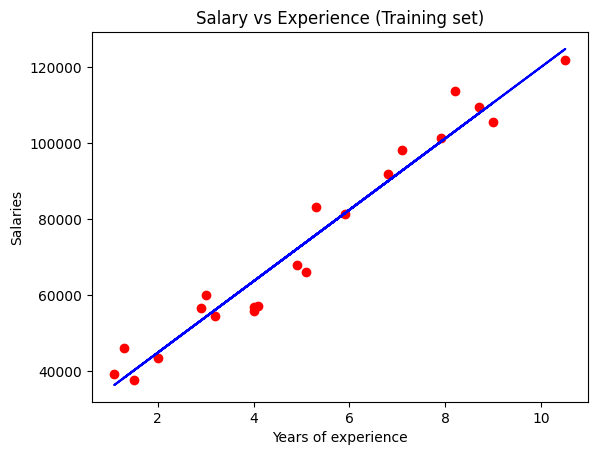

In [11]:
# visualizing the results
#plot for the TRAIN
  
plt.scatter(X_train, y_train, color='red') # plotting the observation line
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
plt.title("Salary vs Experience (Training set)") # stating the title of the graph
  
plt.xlabel("Years of experience") # adding the name of x-axis
plt.ylabel("Salaries") # adding the name of y-axis
plt.show() # specifies end of graph

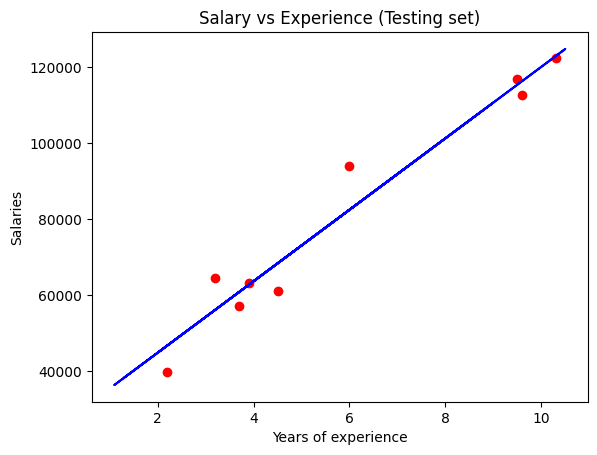

In [12]:
#plot for the TEST
  
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
plt.title("Salary vs Experience (Testing set)")
  
plt.xlabel("Years of experience") 
plt.ylabel("Salaries") 
plt.show() 

In [13]:
# Calculating the Coefficients
print(regressor.coef_)

[9402.17729174]


In [14]:
# Calculating the Intercept
print(regressor.intercept_)

26046.148496665563


In [15]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.955506906266307

$R^2$ is always between 0 and 100%:

- 0% represents a model that does not explain any of the variation in the response variable around its mean. 
- 100% represents a model that explains all the variation in the response variable around its mean.

**Usually,** the larger the $R^2$, the better the regression model fits your observations.

<div class="alert alert-block alert-success">
    <h2 style="text-align: left">Multiple Linear Regression</h2>
</div>

In [16]:
companies = pd.read_csv('1000_Companies.csv')

In [17]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
companies.shape

(1000, 5)

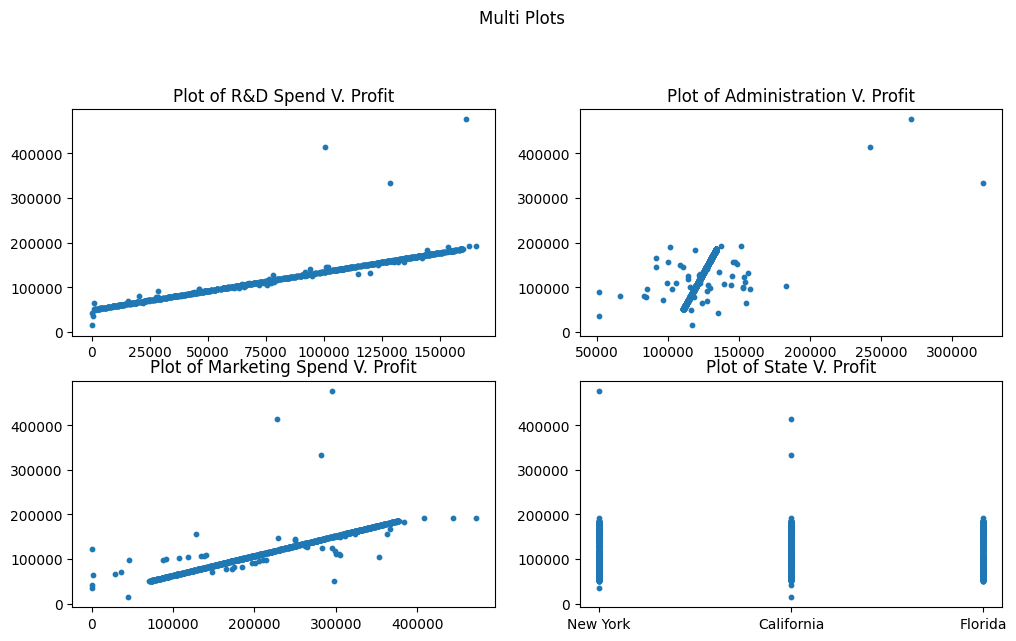

In [19]:
# Visualizing the dataset
num_cols = 2
num_rows = int((companies.shape[1]-1)/num_cols)+1

plt.figure(figsize=(12, 10))
for index, col in enumerate(companies.columns[:-1]):
    x = companies[col].values
    y = companies.iloc[:,-1:].values
    
    plt.subplot(num_rows, num_cols, index+1)
    plt.scatter(x,y, s=10)
    plt.title(f'Plot of {col} V. Profit')


plt.suptitle("Multi Plots")
plt.show()

In [21]:
# Data Visualisation
# Building the Correlation matrix
sns.heatmap(companies.corr)

ValueError: Must pass 2-d input. shape=()

In [ ]:
# Extracting the Independent and Dependent variables
X = companies.iloc[:, :-1]
y = companies.iloc[:, 4].values

In [ ]:
X

In [ ]:
y

<h2 style="text-align: left">Encoding categorical data</h2>

**Multiple ways to encode the categorical data in your dataset:**

#### 1. Find and Replace
- Usually used when there are columns in your data where values are words used to represent numbers. 
- You can use Pandas to directly replace the text values with their numeric equivalent by using replace function.

>**Example:**

```python
cleanup_nums = {
    "num_courses":{
        "four": 4, 
        "two": 2
    },
    "num_credits":{
        "four": 4, 
        "six": 6, 
        "five": 5, 
        "eight": 8,
        "twelve": 12, 
        "three":3 
    }}

df = df.replace(cleanup_nums)
```


#### 2. Label Encoding 
- Simply converting each value in a column to a number.
- You can use Pandas to convert a column to a category, then use those category values for your label encoding
- Disadvantage: numeric values can be "misinterpreted" by the algorithms. For example, the value of 0 is obviously less than the value of 4 but does that really correspond to the dataset in real life?

>**Example:**

```python
df['course_name'] = df['course_name'].astype('category').cat.codes
```

#### 3. One Hot Encoding
- Convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. 
- You can use Pandas' get_dummies function to perform one hot encoding
- Advantage: Has the benefit of not weighting a value improperly 
- Disadvange: the downside of adding more columns to the dataset.

>**Example:**

```python 
df = pd.get_dummies(df, columns=['gender', 'major', ...]).values
```

#### 4. Custom Binary Encoding 
- Depending on the dataset, you may be able to use some combination of label encoding and one hot encoding to create a binary column that meets your needs for further analysis.
- Used if you **only** care about a specific value in your column values. For example, in a student_major field, if you only care about students from the Computer Science major 

> **Example:**

```python 
df["major"] = np.where(df["major"].str.contains("Computer Science"), 1, 0)
```

#### 5. Scikit-Learn ColumnTransfomer 

> **Example:**
```python
ct = ColumnTransformer([('cat_encoder', OneHotEncoder(), ['gender', 'major'])], remainder='passthrough')
encoded_data = ct.fit_transform(df.values)
```

In [ ]:
X

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('cat_encoder', OneHotEncoder(), ['State'])], remainder='passthrough')
X = np.array(ct.fit_transform(X))     

In [ ]:
X

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
# Calculating the Coefficients
print(regressor.coef_)

In [ ]:
# Calculating the Intercept
print(regressor.intercept_)

In [ ]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)